<a href="https://colab.research.google.com/github/dieagus/ML/blob/main/ball_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#!git clone https://github.com/ultralytics/yolov5  # clone
#%cd yolov5
#%pip install -qr requirements.txt  # install

#import torch
#import utils
#display = utils.notebook_init()  # checks


#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Cloning into 'yolov5'...
remote: Enumerating objects: 12378, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 12378 (delta 27), reused 8 (delta 4), pack-reused 12322
Receiving objects: 100% (12378/12378), 12.72 MiB | 31.09 MiB/s, done.
Resolving deltas: 100% (8521/8521), done.
/content/yolov5/yolov5
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 12317, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 12317 (delta 1), reused 1 (delta 0), pack-reused 12310
Receiving objects: 100% (12317/12317), 12.65 MiB | 29.18 MiB/s, done.
Resolving deltas: 100% (8481/8481), done.
/content/yolov5/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#dont need to use this

from google.colab import drive
drive.mount('/content/drive')

from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"
#!pip install roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NjAupoax48Krf7CeezAx")
project = rf.workspace("bball-project").project("thinggf")
dataset = project.version(1).download("yolov5")
#from roboflow import Roboflow
#rf = Roboflow(api_key="NjAupoax48Krf7CeezAx")
#project = rf.workspace("bball-project").project("thing-joapg")
#dataset = project.version(1).download("yolov5")
#!pip install roboflow

#from roboflow import Roboflow
#rf = Roboflow(api_key="NjAupoax48Krf7CeezAx")
#project = rf.workspace("bball-project").project("basketball-images")
#dataset = project.version("1").download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/thinggf-1 in yolov5pytorch:: 100%|██████████| 238/238 [00:00<00:00, 1541.34it/s]


In [ ]:
#!python train.py --img 640 --batch 16 --epochs 3 --data{dataset.location}/data.yaml --weights yolov5s.pt --cache
!python train.py --img 416 --batch 16 --epochs 300 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache


train: weights=yolov5s.pt, cfg=, data=/content/datasets/thinggf-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-111-g1323b48 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.0

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.15 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/thinggf-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-111-g1323b48 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/26 /content/datasets/thinggf-1/test/images/Q2a_MOV-113_jpg.rf.6cb8128186c10b4f2118981f054cec30.jpg: 416x416 4 his, 8.1ms
image 2/26 /content/datasets/thinggf-1/test/images/Q2a_MOV-124_jpg.rf.233bf8177f8a31d5cb5f651a1ae3b91e.jpg: 416x416 2 his, 8.1ms
image 3/26 /content/datasets/thinggf-1/test/images/Q2a_MOV-127_jpg.rf

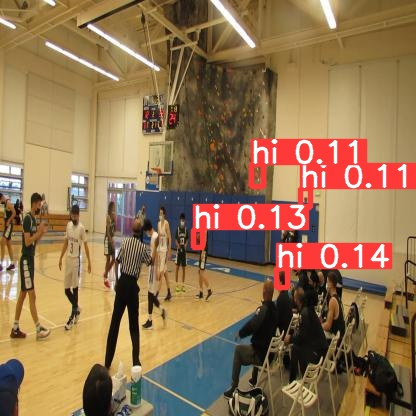

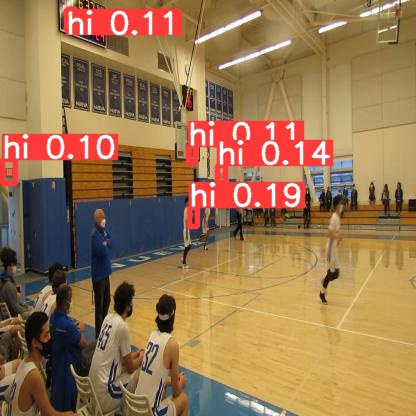

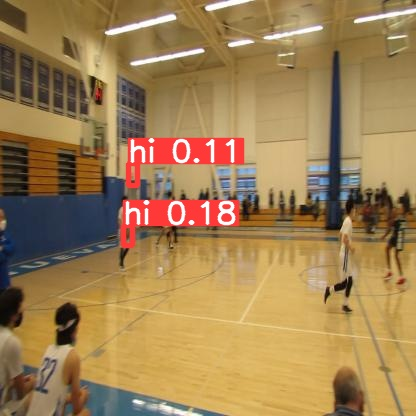

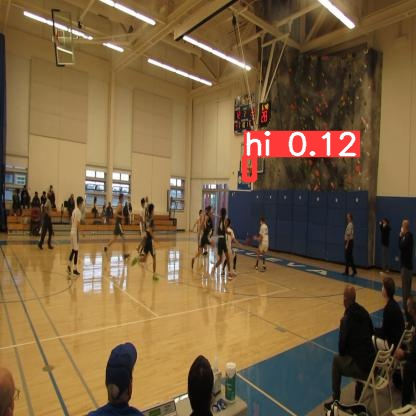

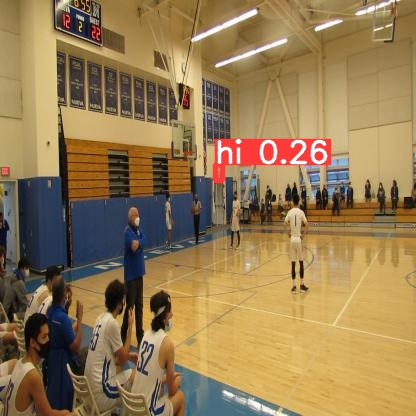

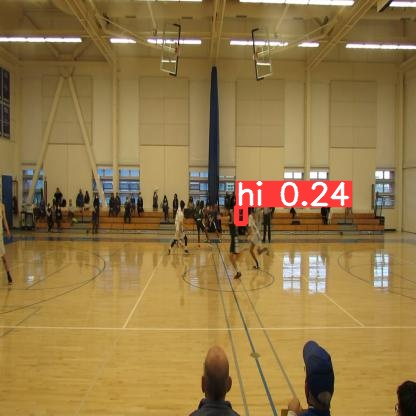

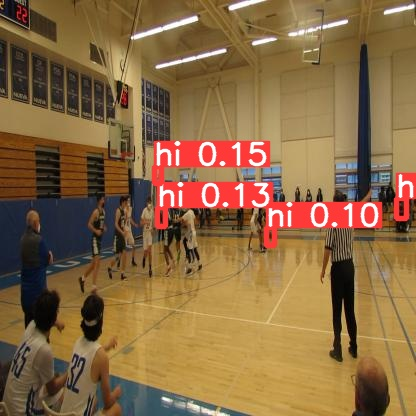

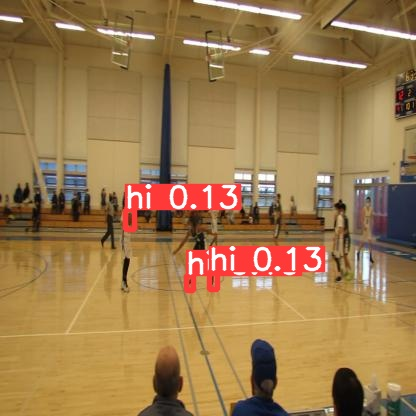

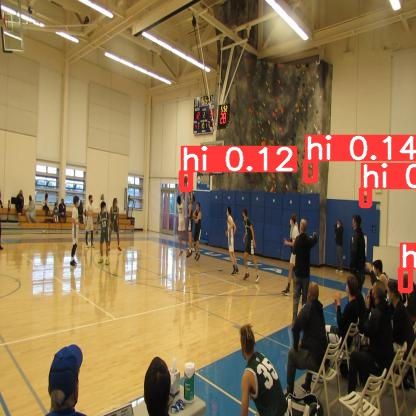

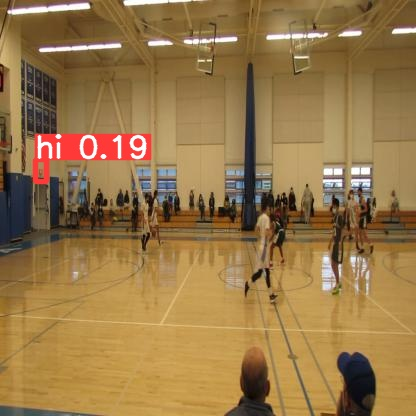

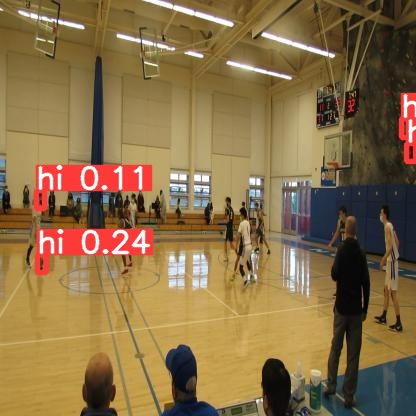

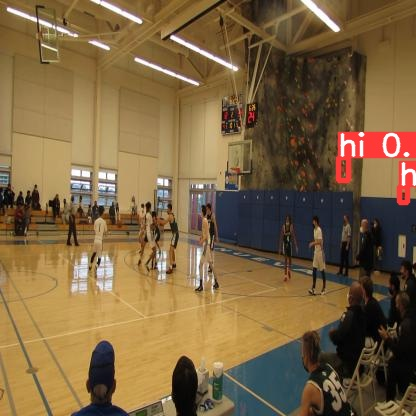

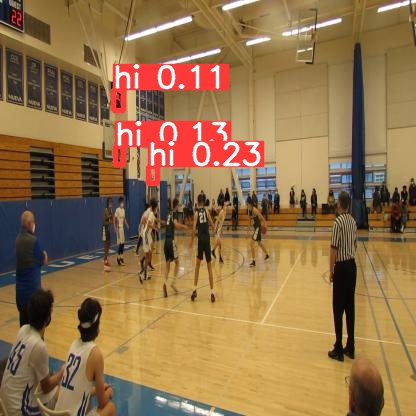

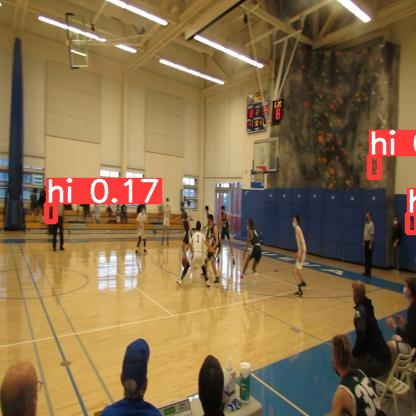

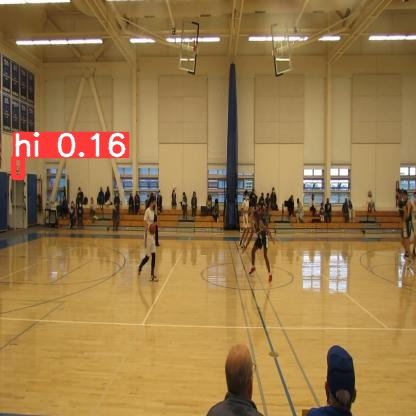

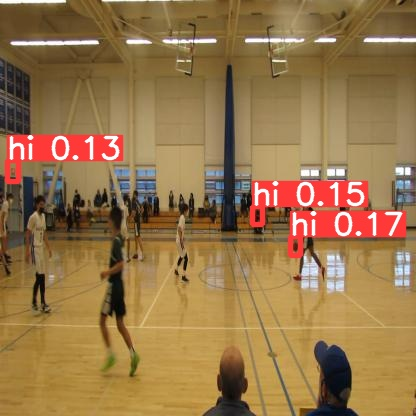

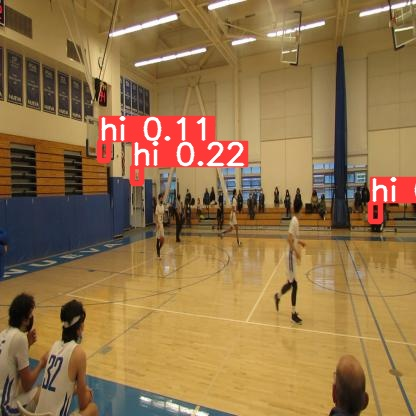

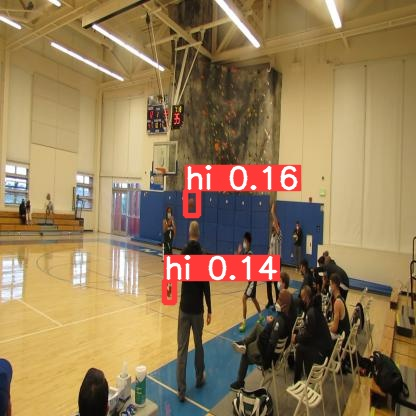

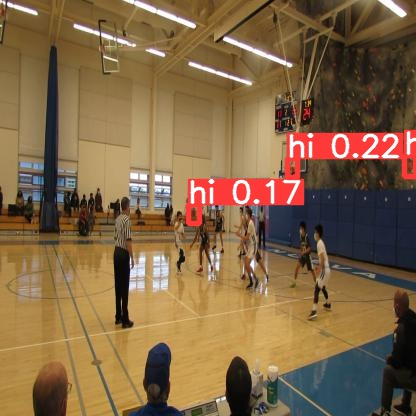

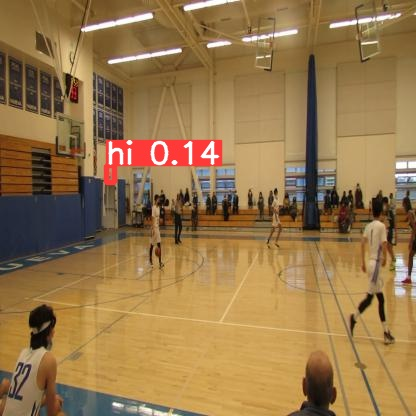

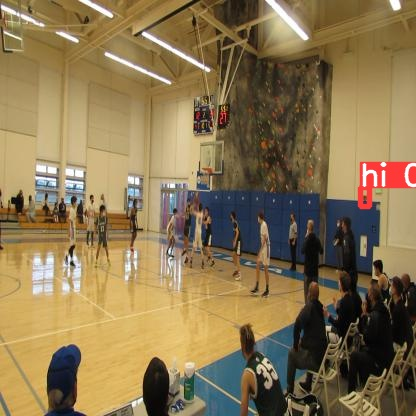

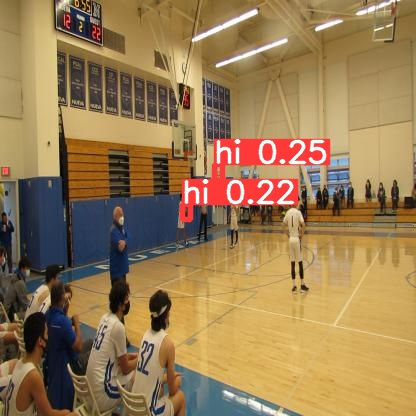

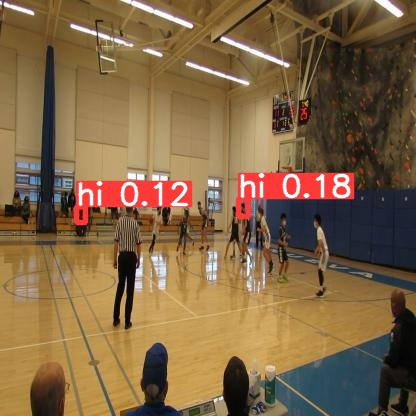

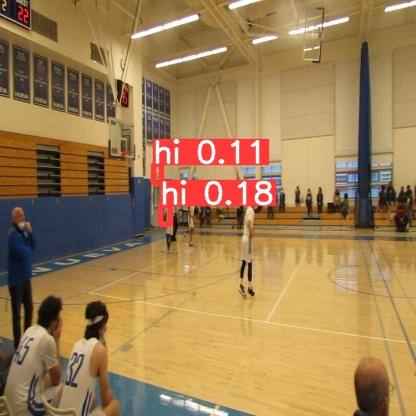

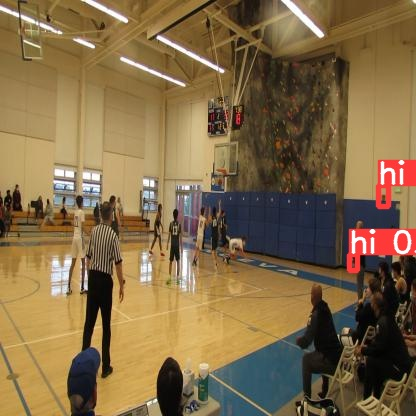

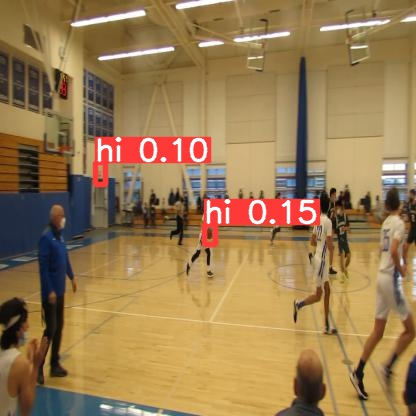

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display


for imageName in glob.glob('/content/yolov5/yolov5/runs/detect/exp3/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#ipython nbconvert notebook.ipynb --to script

SyntaxError: ignored